In [376]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sklearn as sl
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import csv
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from yellowbrick.text.tsne import tsne
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from scipy.stats import kurtosis
from sklearn.random_projection import GaussianRandomProjection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
from scipy.spatial.distance import cdist
import time

In [150]:
def replace_a_column (array, column_number, transformed_column):
    for i in range(len(array)):
        array[i][column_number]=transformed_column[i][0]
    return array

In [151]:
data=np.genfromtxt("processed.cleveland.data",delimiter=",")
num_row=np.shape(data)[0]
row_contain_nan=[]
for i in range(num_row):
    if (np.any(np.isnan(data[i]))):
        row_contain_nan.append(i)
        
#print (row_contain_nan)


data=np.delete(data,row_contain_nan,axis=0)
#print (type(data[0][12]))
#print (data[:,3])

for i in [3,4,7,9]:
    
    scaler = StandardScaler()
    #print("column",i, data[:,i])
    temp_column=data[:,i].reshape(-1,1)
    scaler.fit(temp_column)
    data=replace_a_column(data,i,scaler.transform(temp_column))
    #print("transformed column",i,data[:,i])
heart_disease_features=np.delete(data, -1, axis=1)
heart_disease_label=data[:,-1]

for i in range(len(heart_disease_label)): 
    if heart_disease_label[i]>0:
        heart_disease_label[i]=1
        

print (heart_disease_label)


[0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1.]


In [152]:
data_breast_cancer=np.genfromtxt("breast-cancer-wisconsin.data",delimiter=",")
num_row=np.shape(data_breast_cancer)[0]
for i in range(num_row):
    if (np.any(np.isnan(data_breast_cancer[i]))):
        row_contain_nan.append(i)
data_breast_cancer=np.delete(data_breast_cancer,row_contain_nan,axis=0)        
#print (row_contain_nan)
data_breast_cancer=np.delete(data_breast_cancer,0, axis=1)


X_breast_cancer=np.delete(data_breast_cancer, -1, axis=1)
#print(X_breast_cancer)
Y_breast_cancer=data_breast_cancer[:,-1]
for i in range (0, len(Y_breast_cancer)):
    Y_breast_cancer[i]=Y_breast_cancer[i]/2-1
#print(y_breast_cancer)
#breast_cancer_train, breast_cancer_test, breast_cancer_lable_train, breast_cancer_lable_test = train_test_split(X_breast_cancer, y_breast_cancer, test_size=0.3, random_state=42)
#print ()
df_X_breast_cancer=pd.DataFrame(X_breast_cancer)
df_Y_breast_cancer=pd.DataFrame(Y_breast_cancer)
#print(df_Y_breast_cancer)

In [153]:
def tsne_plot(data, labels):
    plt.figure()
    tsne(data, labels, decompose_by=data.shape[1]-1, random_state=0, show=False)

In [355]:
def plot_elbow(data, title):
    
    distortions = []
    inertias = []
    

    for k in range(1,10):
        kmean = KMeans(n_clusters=k, random_state=0)
        kmean.fit(data)

        distortions.append(sum(np.min(cdist(data, kmean.cluster_centers_,
                                            'euclidean'), axis=1)) / data.shape[0])
        inertias.append(kmean.inertia_)

        
    

    plt.figure()
    plt.plot(range(1,10), distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    title=title+" The Elbow Method using Distortion"
    plt.title(title)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(range(1,10), inertias, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    title=title+" The Elbow Method using Inertia"
    plt.title(title)

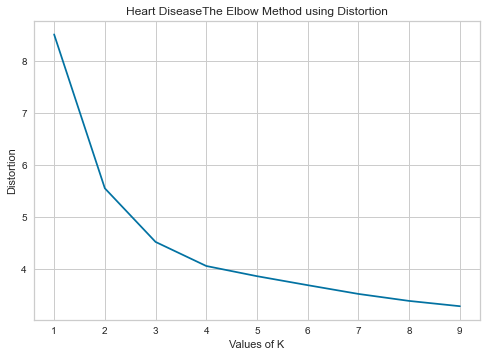

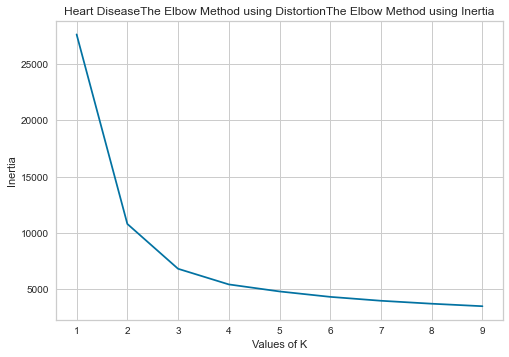

In [357]:
plot_elbow(heart_disease_features, "Heart Disease")

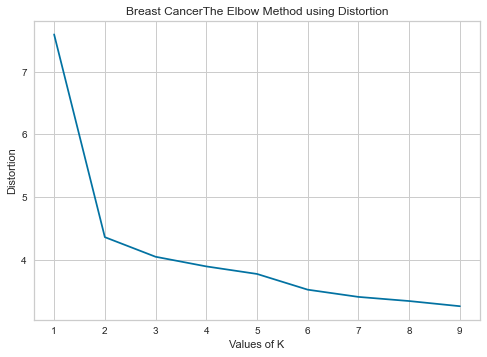

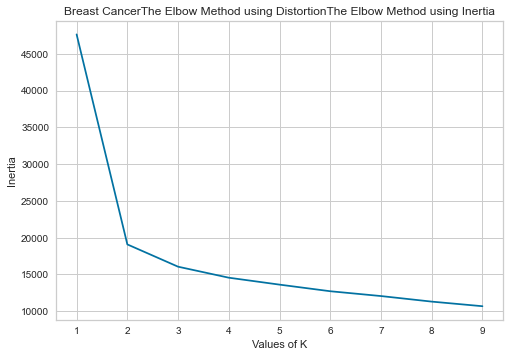

In [358]:
plot_elbow(X_breast_cancer, "Breast Cancer")

In [154]:
def plot_kmean(data, label, cluster_number,title):
    kmeans = KMeans(n_clusters= cluster_number)

#predict the labels of clusters.
    predict_label = kmeans.fit_predict(data)
    data_transform = kmeans.transform(data)
   
    
    
    tsne_plot(data_transform, predict_label)
    title_1=title+" Prediction Label"
    plt.title(title_1)
    plt.show()
    plt.close()
    tsne_plot(data_transform, label)
    title_2=title+" Real Label"
    plt.title(title_2)
    plt.show()
    plt.close()
    score=accuracy_score(predict_label, label)
    if score<0.5:
        score=1-score
    return (score)
    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

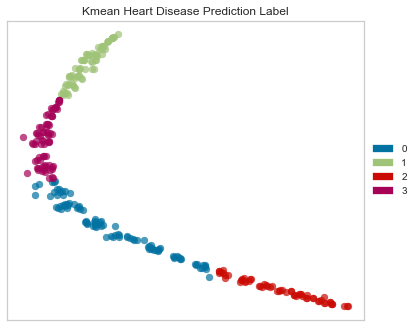

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


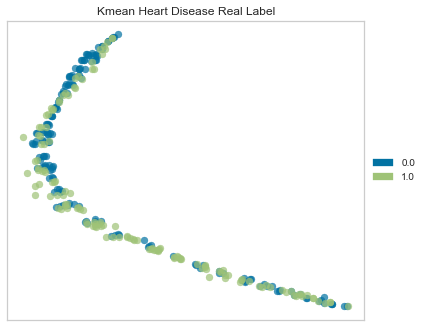

0.835016835016835


In [359]:
print(plot_kmean(heart_disease_features,heart_disease_label,4, "Kmean Heart Disease"))
#print(plot_kmean(X_breast_cancer,Y_breast_cancer,2, "Kmean Breast Cancer"))

In [ ]:
#print(plot_kmean(heart_disease_features,heart_disease_label,2))
#print(plot_kmean(X_breast_cancer,Y_breast_cancer,2))

In [156]:
def plot_EM(data, label, n_components,covariance,title):
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance, random_state=0).fit(data)
    predict_label = gmm.predict(data)

    
     
    

    tsne_plot(data, predict_label)
    title_1=title+" Prediction Label"
    plt.title(title_1)
    plt.show()
    plt.close()
    tsne_plot(data, label)
    title_2=title+" Real Label"
    plt.title(title_2)
    plt.show()
    plt.close()
    score=accuracy_score(predict_label, label)
    if score<0.5:
        score=1-score
    return (score)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

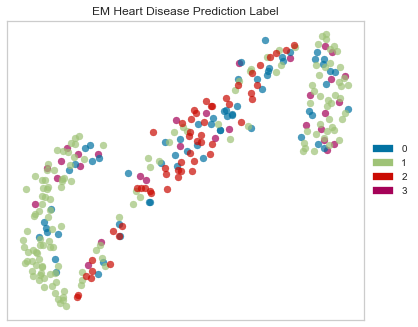

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


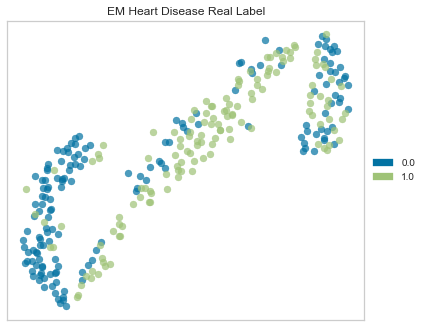

0.7912457912457913


In [360]:
print(plot_EM(heart_disease_features,heart_disease_label,4,"diag", "EM Heart Disease"))
#print(plot_EM(X_breast_cancer,Y_breast_cancer,2,"diag","EM Breast Cancer"))

In [239]:
def pca_plot(data, title):
    
    explained_variance_ratio=[]
    number_features=np.size(data,1)
    print(number_features)
    for n in range(number_features):
        pca = PCA(n_components=n, random_state=0)
        pca.fit(data)
        print(pca.explained_variance_ratio_)
        explained_variance_ratio_sum=np.sum(pca.explained_variance_ratio_)*100
        explained_variance_ratio.append(explained_variance_ratio_sum)
        
    #print(explained_variance_ratio)
    title=title+'Cumulative Explained Variance as a Function of the Number of Components'
    plt.figure()
    plt.plot(range(number_features), explained_variance_ratio, color='red', label='cumulative explained variance')
    plt.title(title)
    plt.ylabel('Cumulative Explained variance')
    plt.xlabel('Principal components')
    plt.axhline(y=95, color='k', linestyle='--', label='95% Explained Variance')
    plt.legend(loc='best')
    plt.show()
    plt.close()


13
[]
[0.88267711]
[0.88267711 0.04481291]
[0.88267711 0.04481291 0.01362904]
[0.88267711 0.04481291 0.01362904 0.01271864]
[0.88267711 0.04481291 0.01362904 0.01271864 0.01040184]
[0.88267711 0.04481291 0.01362904 0.01271864 0.01040184 0.00868576]
[0.88267711 0.04481291 0.01362904 0.01271864 0.01040184 0.00868576
 0.00748596]
[0.88267711 0.04481291 0.01362904 0.01271864 0.01040184 0.00868576
 0.00748596 0.00723587]
[0.88267711 0.04481291 0.01362904 0.01271864 0.01040184 0.00868576
 0.00748596 0.00723587 0.005568  ]
[0.88267711 0.04481291 0.01362904 0.01271864 0.01040184 0.00868576
 0.00748596 0.00723587 0.005568   0.00221369]
[0.88267711 0.04481291 0.01362904 0.01271864 0.01040184 0.00868576
 0.00748596 0.00723587 0.005568   0.00221369 0.00180528]
[0.88267711 0.04481291 0.01362904 0.01271864 0.01040184 0.00868576
 0.00748596 0.00723587 0.005568   0.00221369 0.00180528 0.00155977]


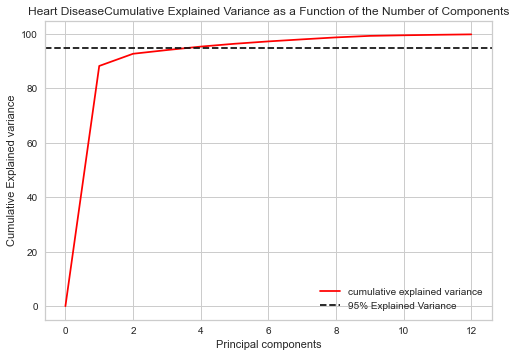

In [240]:
pca_plot(heart_disease_features, "Heart Disease")

9
[]
[0.68902147]
[0.68902147 0.07273643]
[0.68902147 0.07273643 0.06052682]
[0.68902147 0.07273643 0.06052682 0.0448576 ]
[0.68902147 0.07273643 0.06052682 0.0448576  0.03951585]
[0.68902147 0.07273643 0.06052682 0.0448576  0.03951585 0.03409553]
[0.68902147 0.07273643 0.06052682 0.0448576  0.03951585 0.03409553
 0.02544758]
[0.68902147 0.07273643 0.06052682 0.0448576  0.03951585 0.03409553
 0.02544758 0.02252301]


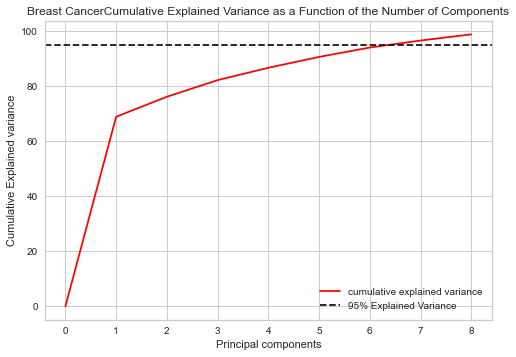

In [241]:
pca_plot(X_breast_cancer, "Breast Cancer")

In [296]:
def two_dimension_plot(data, true_labels, title):
    plt.figure()
    lw = 2
    label_space = [0,1]
    colors = ['blue', 'red']
    for color, i in zip(colors, label_space):
        plt.scatter(data[true_labels == i, 0], data[true_labels == i, 1], alpha=.8, lw=2,
                    label=i)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)

In [182]:
def pca_transform (data,number_components):
    pca=PCA(number_components,random_state=0)
    return pca.fit_transform(data)

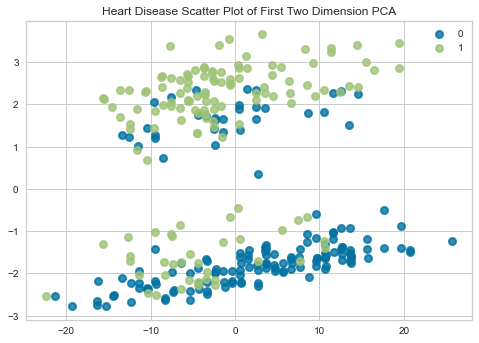

In [297]:
pca_data=pca_transform(heart_disease_features,4)
two_dimension_plot(pca_data, heart_disease_label, "Heart Disease Scatter Plot of First Two Dimension PCA")

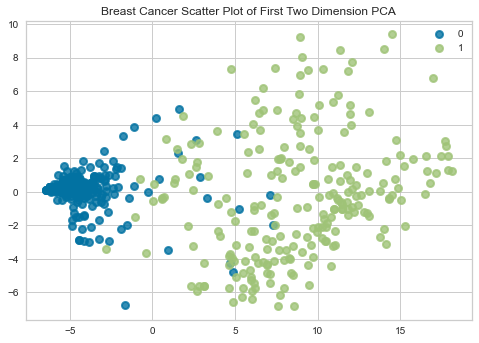

In [298]:
pca_data=pca_transform(X_breast_cancer, 6)
two_dimension_plot(pca_data, Y_breast_cancer, "Breast Cancer Scatter Plot of First Two Dimension PCA")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

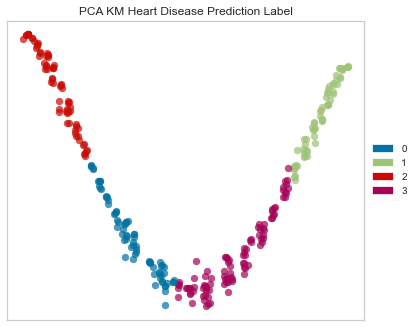

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


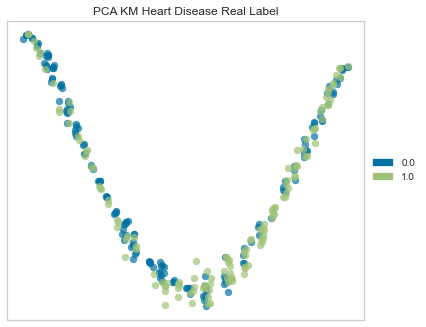

0.734006734006734


In [361]:
transform_data=pca_transform(heart_disease_features,4)

print(plot_kmean(transform_data,heart_disease_label,4, "PCA KM Heart Disease"))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

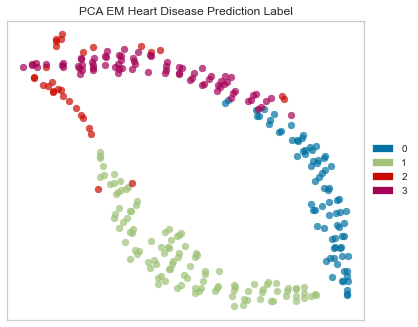

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


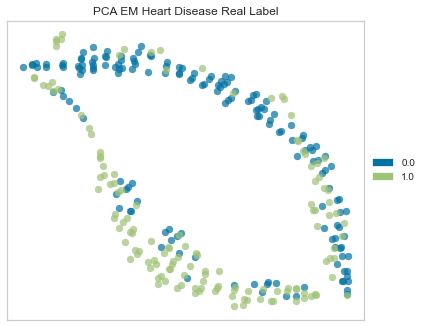

0.5420875420875421


In [362]:
transform_data=pca_transform(heart_disease_features,4)

#transform_data=pca_transform(heart_disease_features,4)
#print(plot_kmean(transform_data,heart_disease_label,2, "PCA KM Heart Disease"))
print(plot_EM(transform_data,heart_disease_label,4, "diag","PCA EM Heart Disease"))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


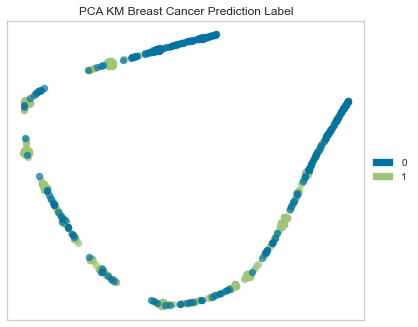

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


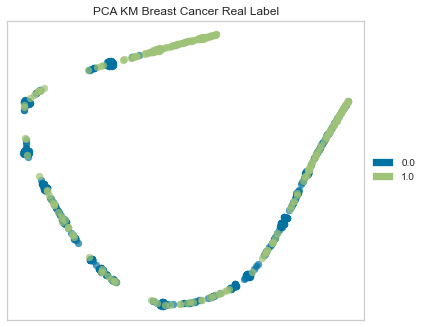

0.9615952732644018


In [243]:
transform_data=pca_transform(X_breast_cancer,6)
print(plot_kmean(transform_data,Y_breast_cancer,2, "PCA KM Breast Cancer"))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


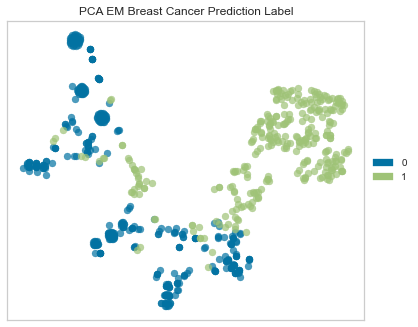

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


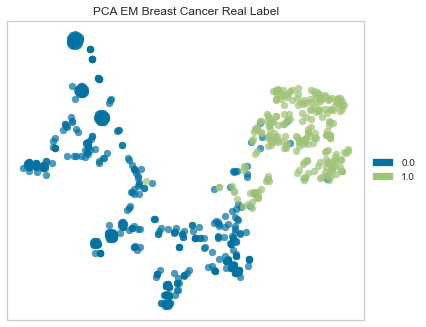

0.8833087149187593


In [244]:
transform_data=pca_transform(X_breast_cancer,6)

print(plot_EM(transform_data,Y_breast_cancer,2, "diag","PCA EM Breast Cancer"))

In [223]:
def ica_plot(data,title):
    
    kurtosis_value=[]
    number_features=np.size(data,1)
    #print(number_features)
    for n in range(1,number_features):
        ica = FastICA(n_components=n, max_iter=500, random_state=0)
        transformed = ica.fit_transform(data)
        #print(transformed)
        kurt_values = kurtosis(transformed, axis=0)
        #print(kurt_values)
        kurtosis_value.append(np.mean(abs(kurt_values)))
        
        
    #print(kurtosis_value)
    
    plt.figure()
    plt.plot(range(1,number_features), kurtosis_value, color='red', label='Kurtosis')
    plt.title(title)
    plt.ylabel('Kurtosis')
    plt.xlabel('Principal components')
    
    
    plt.show()
    plt.close()

C:\Users\sarge\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\sarge\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\sarge\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\sarge\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


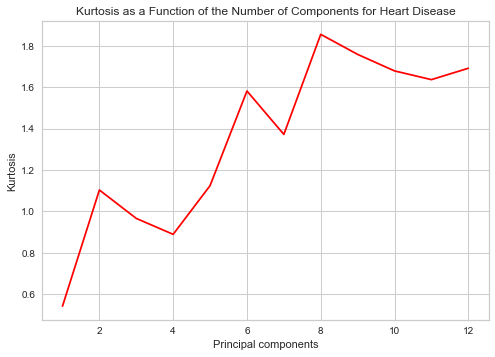

In [224]:
ica_plot(heart_disease_features,'Kurtosis as a Function of the Number of Components for Heart Disease')


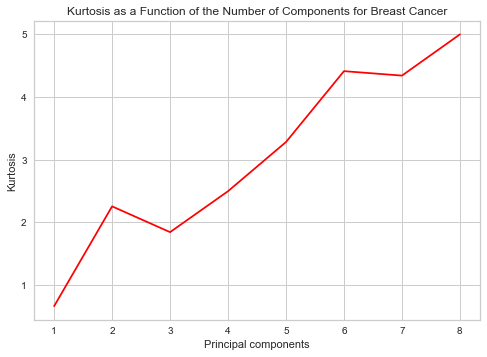

In [245]:
ica_plot(X_breast_cancer,'Kurtosis as a Function of the Number of Components for Breast Cancer')

In [227]:
def ica_transform (data,number_components):
    ica=FastICA(number_components, max_iter=500, random_state=0)
    return ica.fit_transform(data)

C:\Users\sarge\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


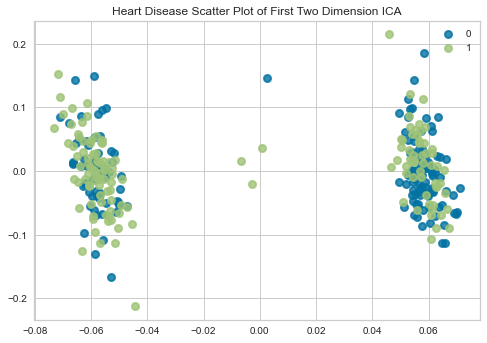

In [302]:
ica_data=ica_transform(heart_disease_features,8)
two_dimension_plot(ica_data, heart_disease_label, "Heart Disease Scatter Plot of First Two Dimension ICA")

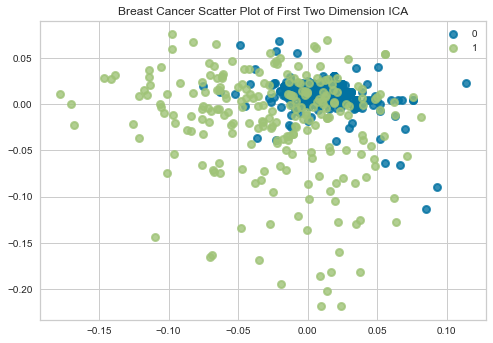

In [303]:
ica_data=ica_transform(X_breast_cancer,6)
two_dimension_plot(ica_data, Y_breast_cancer, "Breast Cancer Scatter Plot of First Two Dimension ICA")

C:\Users\sarge\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length mat

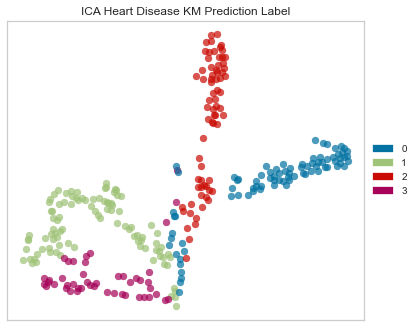

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


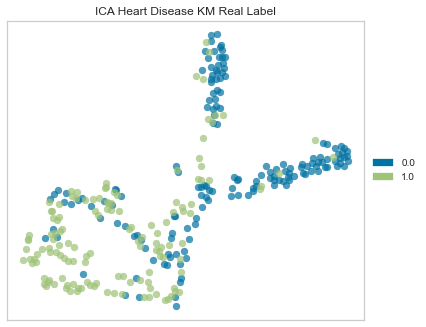

0.5353535353535354


In [363]:
transform_data=ica_transform(heart_disease_features,8)

print (plot_kmean(transform_data,heart_disease_label,4, "ICA Heart Disease KM"))

C:\Users\sarge\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length mat

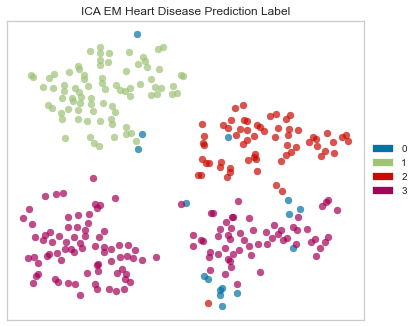

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


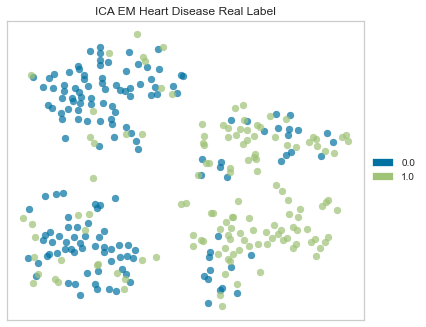

0.9427609427609428


In [364]:
transform_data=ica_transform(heart_disease_features,8)
print(plot_EM(transform_data,heart_disease_label,4,"diag", "ICA EM Heart Disease"))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


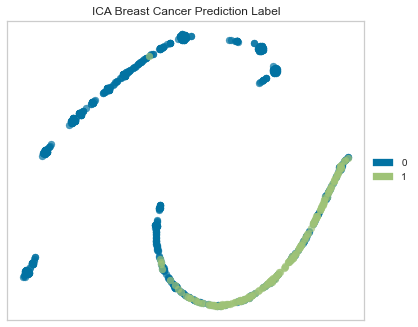

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


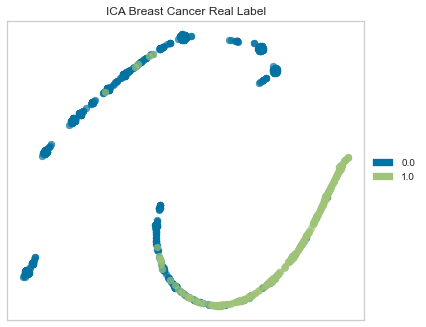

0.8847858197932054


In [263]:
transform_data=ica_transform(X_breast_cancer,6)
print(plot_kmean(transform_data,Y_breast_cancer,2, "ICA Breast Cancer"))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


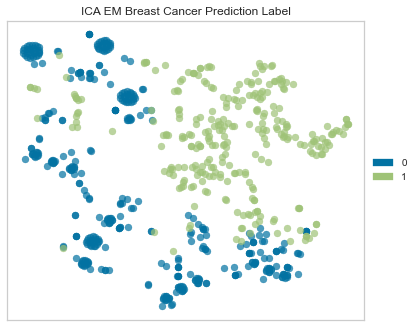

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


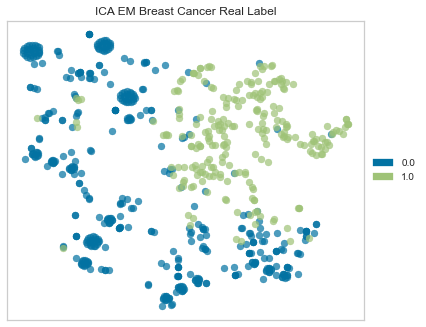

0.9113737075332349


In [265]:
transform_data=ica_transform(X_breast_cancer,6)
print(plot_EM(transform_data,Y_breast_cancer,2, "diag","ICA EM Breast Cancer"))

In [274]:
def rca_plot(data,title):
    
    reconstruction_errors=[]
    number_features=np.size(data,1)
    #print(number_features)
    for n in range(1,number_features):
        
        for state in [5,30,50,200, 0]:
            rca = GaussianRandomProjection(n_components=n, random_state=state)
            transformed_data = rca.fit_transform(data)
            inverse_data = np.linalg.pinv(rca.components_.T)
            reconstructed_data = transformed_data.dot(inverse_data)
            loss = ((data - reconstructed_data) ** 2).mean()
        reconstruction_errors.append(loss)    
        
        
        
    #print(kurtosis_value)
    
    plt.figure()
    plt.plot(range(1,number_features), reconstruction_errors, color='red', label='Reconstruction Errors')
    title=title+" RCA Reconstruction Errors Components Curve"
    plt.title(title)
    plt.ylabel('Reconstruction Errors')
    plt.xlabel('Principal components')
    
    
    plt.show()
    plt.close()

    

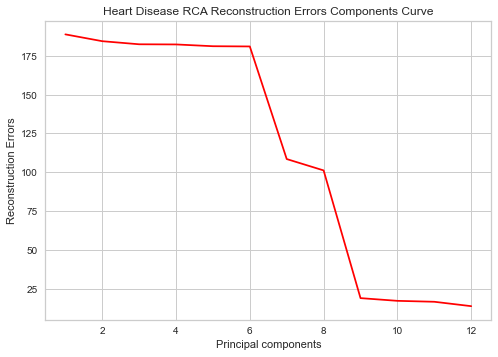

In [275]:
rca_plot(heart_disease_features,'Heart Disease')


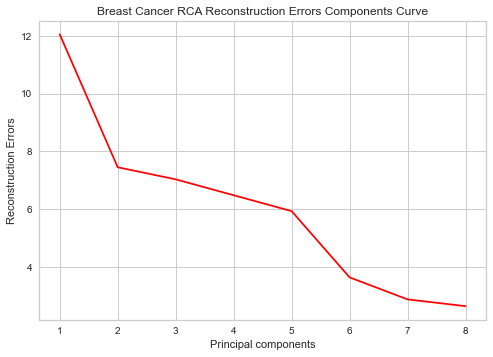

In [276]:
rca_plot(X_breast_cancer, "Breast Cancer")

In [278]:
def rca_transform (data,number_components):
    rca=GaussianRandomProjection(number_components,random_state=50)
    return rca.fit_transform(data)

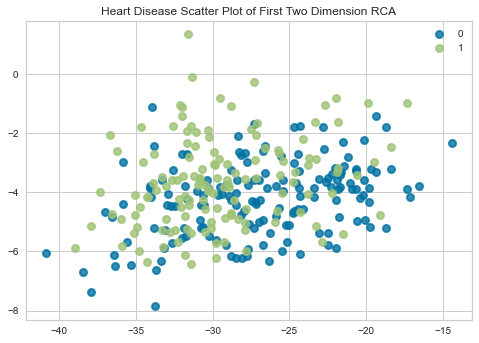

In [365]:
rca_data=rca_transform(heart_disease_features,9)
two_dimension_plot(rca_data, heart_disease_label, "Heart Disease Scatter Plot of First Two Dimension RCA")

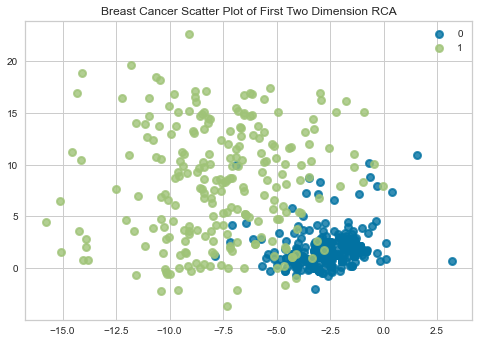

In [366]:
rca_data=rca_transform(X_breast_cancer,8)
two_dimension_plot(rca_data, Y_breast_cancer, "Breast Cancer Scatter Plot of First Two Dimension RCA")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

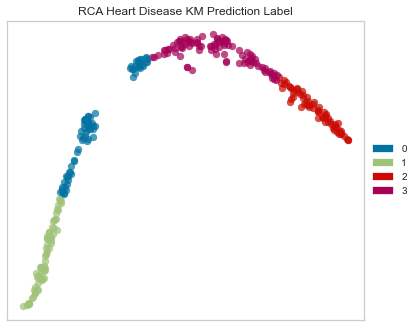

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


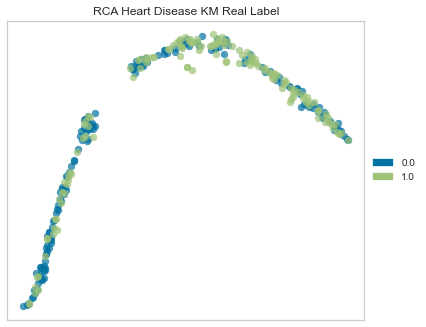

0.7777777777777778


In [368]:
transform_data=rca_transform(heart_disease_features,8)

print (plot_kmean(transform_data,heart_disease_label,4, "RCA Heart Disease KM"))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


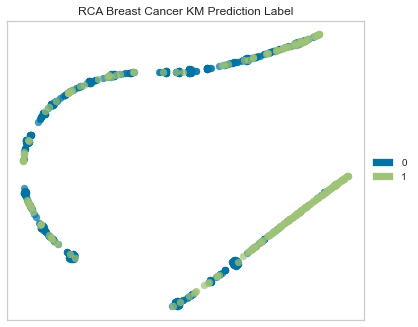

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


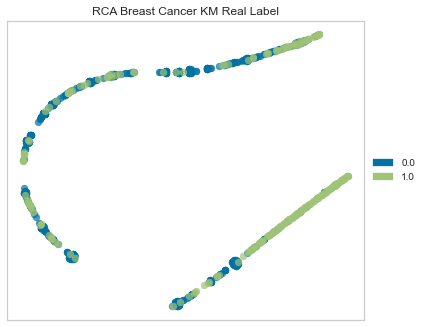

0.9615952732644018


In [280]:
transform_data=rca_transform(X_breast_cancer,6)

print (plot_kmean(X_breast_cancer,Y_breast_cancer,2, "RCA Breast Cancer KM"))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

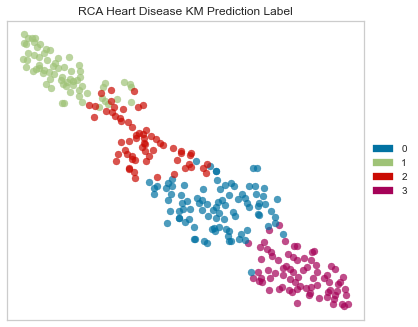

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


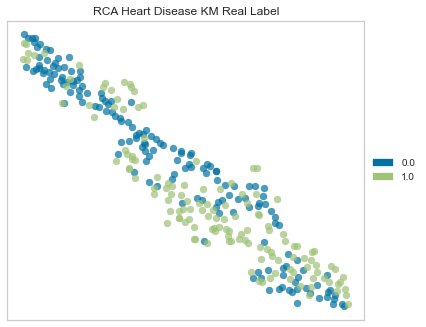

0.835016835016835


In [369]:
transform_data=rca_transform(heart_disease_features,9)

print (plot_EM(transform_data,heart_disease_label,4, "diag","RCA Heart Disease KM"))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


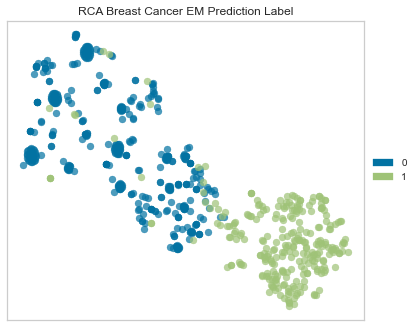

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


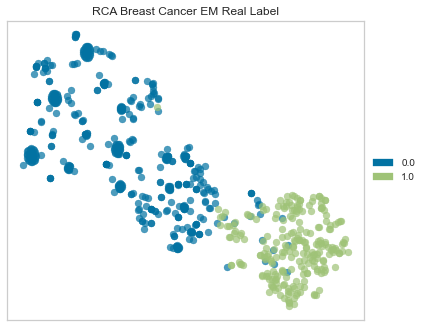

0.9379615952732644


In [282]:
transform_data=rca_transform(X_breast_cancer,6)

print (plot_EM(X_breast_cancer,Y_breast_cancer,2, "diag","RCA Breast Cancer EM"))

In [341]:
def RFE_plot(data,label,title):
    
    scores=[]
    number_features=np.size(data,1)
    #print(number_features)
    for n in range(1,number_features):
        
        estimator = RandomForestClassifier()
        selector = RFE(estimator, n_features_to_select=n, step=1)
        selector.fit(data,label)
        score = selector.score(data,label)  
        
        scores.append(score)
        print(score)
        #explained_variance_ratio.append(np.sum(lda.explained_variance_ratio_))
        
        
    #print(kurtosis_value)
    
    plt.figure()
    plt.plot(range(1,number_features), scores, color='red', label='Score')
    title=title+" RFE Score Components Curve"
    plt.title(title)
    plt.ylabel('Scores')
    plt.xlabel('Principal components')
    
    
    plt.show()
    plt.close()

0.7542087542087542
0.9494949494949495
0.9966329966329966
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


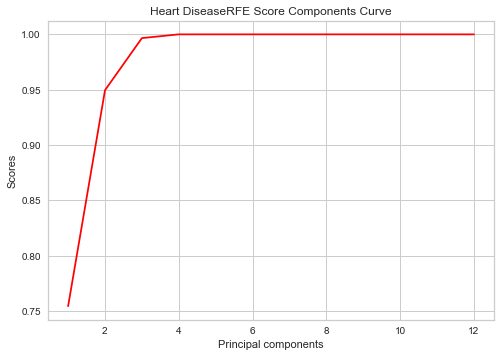

In [339]:
RFE_plot(heart_disease_features, heart_disease_label, "Heart Disease")

lda_plot(heart_disease_features, heart_disease_label, "Heart Disease")

0.9290989660265879
0.9497784342688331
0.9881831610044313
0.9970457902511078
1.0
1.0
1.0
1.0


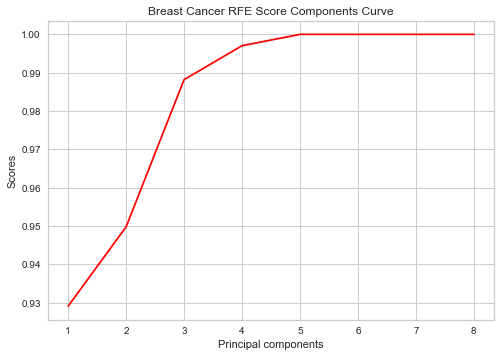

In [342]:
RFE_plot(X_breast_cancer, Y_breast_cancer, "Breast Cancer")

In [345]:
def rfe_transform (data,label,number_components):
    estimator = RandomForestClassifier()
    selector = RFE(estimator, n_features_to_select=number_components, step=1)
    return selector.fit_transform(data,label)

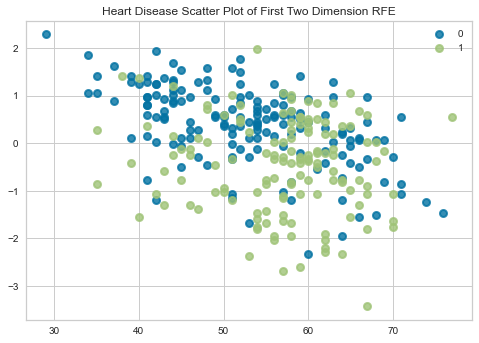

In [347]:
transform_data=rfe_transform(heart_disease_features,heart_disease_label,3)


two_dimension_plot(transform_data, heart_disease_label, "Heart Disease Scatter Plot of First Two Dimension RFE")

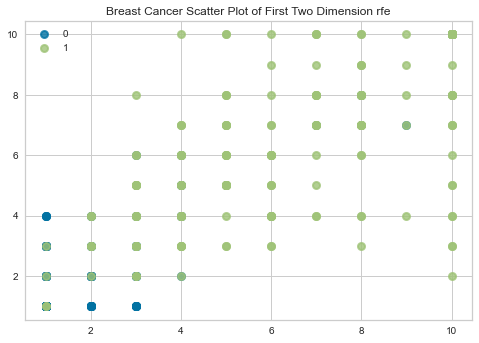

In [392]:
transform_data=rfe_transform(X_breast_cancer,Y_breast_cancer,4)


two_dimension_plot(transform_data, Y_breast_cancer, "Breast Cancer Scatter Plot of First Two Dimension rfe")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

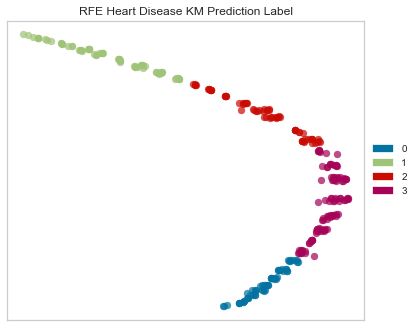

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


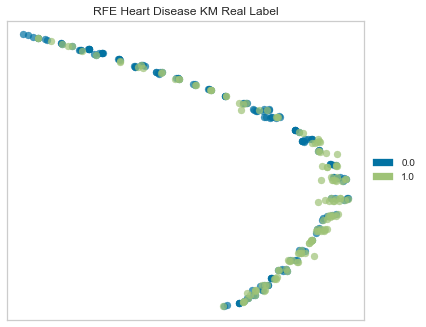

0.8383838383838383


In [370]:
transform_data=rfe_transform(heart_disease_features,heart_disease_label,3)

print (plot_kmean(transform_data,heart_disease_label,4, "RFE Heart Disease KM"))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

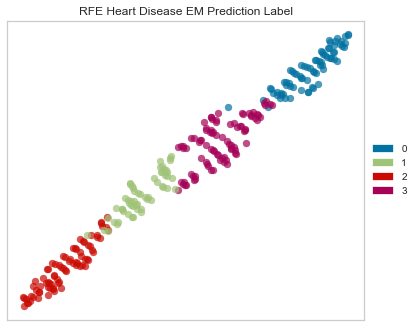

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


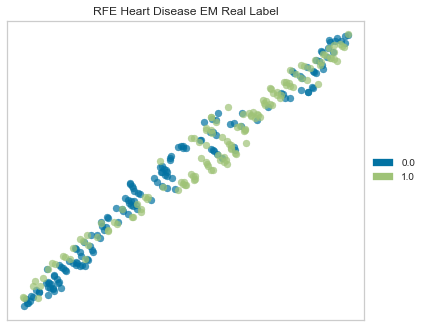

0.8316498316498316


In [372]:
transform_data=rfe_transform(heart_disease_features,heart_disease_label,3)

print (plot_EM(transform_data,heart_disease_label,4,"diag", "RFE Heart Disease EM"))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


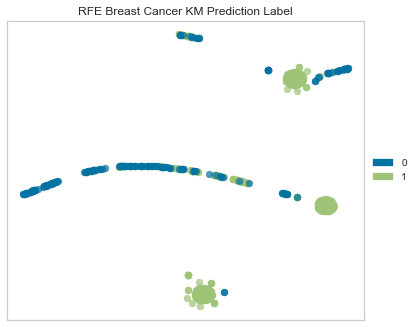

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


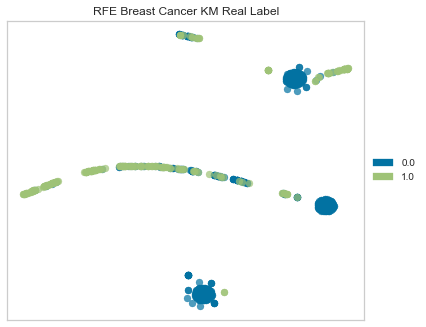

0.9512555391432792


In [393]:
transform_data=rfe_transform(X_breast_cancer,Y_breast_cancer,4)

print (plot_kmean(transform_data,Y_breast_cancer,2, "RFE Breast Cancer KM"))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


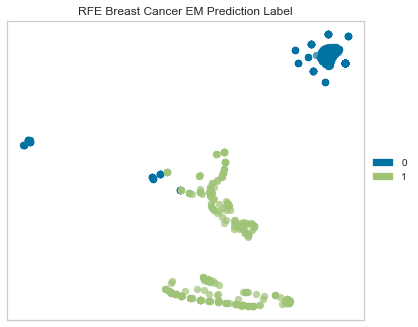

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


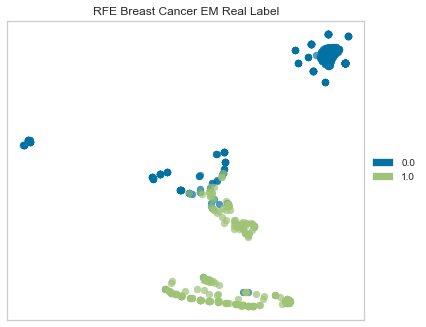

0.8833087149187593


In [390]:
transform_data=rfe_transform(X_breast_cancer,Y_breast_cancer,4)

print (plot_EM(transform_data,Y_breast_cancer,2,"diag", "RFE Breast Cancer EM"))

In [378]:
    #heart {'activation': 'relu', 'alpha': 1e-06, 'hidden_layer_sizes': 11, 'max_iter': 1700, 'random_state': 1, 'solver': 'adam'}
    def neuron_network (data, label): 
        cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

        estimator  =MLPClassifier(activation='relu', alpha=1e-06, max_iter=1700, random_state=1,hidden_layer_sizes=11, solver="adam")
        start_time=time.time()
        estimator.fit(data,label)
        end_time=time.time()
        time_used=end_time-start_time
        scores=estimator.score(data,label)
        return scores, time_used


In [379]:
print(neuron_network (heart_disease_features, heart_disease_label))

(0.8585858585858586, 0.9039974212646484)


In [380]:
pca_data=pca_transform(heart_disease_features,4)
print(neuron_network (pca_data, heart_disease_label))

(0.8148148148148148, 0.31099987030029297)


In [381]:
ica_data=ica_transform(heart_disease_features,8)
print(neuron_network (ica_data, heart_disease_label))

C:\Users\sarge\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


(0.8585858585858586, 0.6909985542297363)


In [382]:
rca_data=rca_transform(heart_disease_features,9)
print(neuron_network (rca_data, heart_disease_label))

(0.797979797979798, 0.886000394821167)


In [384]:
transform_data=rfe_transform(heart_disease_features,heart_disease_label,3)
print(neuron_network (transform_data, heart_disease_label))

(0.7474747474747475, 0.30100107192993164)


In [388]:
def kmean_transform(data):
    kmeans = KMeans(n_clusters=4)

#predict the labels of clusters.
    predict_label = kmeans.fit_predict(data)
    length=np.size(predict_label, axis=0)
    new_predict_label=np.reshape(predict_label,(length,1))
    data_transform = np.append(data, new_predict_label, axis=1)
    return data_transform

print(neuron_network(kmean_transform(heart_disease_features), heart_disease_label))

(0.835016835016835, 0.4830000400543213)


In [389]:
def EM_transform(data):
    gmm = GaussianMixture(n_components=4, covariance_type="diag", random_state=0).fit(data)
    predict_label = gmm.predict(data)

    length=np.size(predict_label, axis=0)
    new_predict_label=np.reshape(predict_label,(length,1))
    data_transform = np.append(data, new_predict_label, axis=1)
    return data_transform

print(neuron_network(EM_transform(heart_disease_features), heart_disease_label))

(0.8417508417508418, 0.4799685478210449)
